# Data Exploration Notebook

This notebook performs initial exploration of the HuMob challenge datasets.

In [11]:
import os
print(os.getcwd())


d:\GL\notebooks


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plotting style
sns.set_style('whitegrid')

# Define data directory (adjust if your notebook is not in the 'notebooks' folder)
# Assumes the notebook is run from the project root or the 'notebooks' directory
if os.path.basename(os.getcwd()) == 'notebooks':
    data_raw_dir = '../data/raw'
else:
    data_raw_dir = 'data/raw'

# File paths
task1_file = os.path.join(data_raw_dir, 'task1_dataset_kotae.csv')
task2_file = os.path.join(data_raw_dir, 'task2_dataset_kotae.csv')
poi_file = os.path.join(data_raw_dir, 'cell_POIcat.csv')
poi_cat_file = os.path.join(data_raw_dir, 'POI_datacategories.csv')

## Load Task 1 Data

In [13]:
try:
    task1_df = pd.read_csv(task1_file)
    print(f"Task 1 data loaded successfully: {task1_df.shape[0]:,} rows, {task1_df.shape[1]} columns")
    display(task1_df.head())
    print("\nTask 1 Data Info:")
    task1_df.info()
except FileNotFoundError:
    print(f"Error: {task1_file} not found. Make sure the raw data is in {data_raw_dir}")

Task 1 data loaded successfully: 111,535,175 rows, 5 columns


uid  d   t   x   y
0    0  0   1  79  86
1    0  0   2  79  86
2    0  0   8  77  86
3    0  0   9  77  86
4    0  0  19  81  89


Task 1 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111535175 entries, 0 to 111535174
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   uid     int64
 1   d       int64
 2   t       int64
 3   x       int64
 4   y       int64
dtypes: int64(5)
memory usage: 4.2 GB


## Load Task 2 Data

In [14]:
try:
    task2_df = pd.read_csv(task2_file)
    print(f"Task 2 data loaded successfully: {task2_df.shape[0]:,} rows, {task2_df.shape[1]} columns")
    display(task2_df.head())
    print("\nTask 2 Data Info:")
    task2_df.info()
except FileNotFoundError:
    print(f"Error: {task2_file} not found. Make sure the raw data is in {data_raw_dir}")

Task 2 data loaded successfully: 29,389,749 rows, 5 columns


uid  d  t    x   y
0    0  0  0  163  60
1    0  0  1  163  60
2    0  0  2  163  61
3    0  0  5  163  60
4    0  0  8  163  61


Task 2 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29389749 entries, 0 to 29389748
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   uid     int64
 1   d       int64
 2   t       int64
 3   x       int64
 4   y       int64
dtypes: int64(5)
memory usage: 1.1 GB


## Load POI Data

In [15]:
try:
    poi_df = pd.read_csv(poi_file)
    print(f"POI data loaded successfully: {poi_df.shape[0]:,} rows, {poi_df.shape[1]} columns")
    display(poi_df.head())
    print("\nPOI Data Info:")
    poi_df.info()
except FileNotFoundError:
    print(f"Error: {poi_file} not found. Make sure the raw data is in {data_raw_dir}")

POI data loaded successfully: 221,159 rows, 4 columns


x  y  POIcategory  POI_count
0  1  1           48          4
1  1  1           58          1
2  1  1           59          1
3  1  1           69          2
4  1  1           73          1


POI Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221159 entries, 0 to 221158
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   x            221159 non-null  int64
 1   y            221159 non-null  int64
 2   POIcategory  221159 non-null  int64
 3   POI_count    221159 non-null  int64
dtypes: int64(4)
memory usage: 6.7 MB


## Load POI Categories Data

In [16]:
try:
    poi_cat_df = pd.read_csv(poi_cat_file)
    print(f"POI categories data loaded successfully: {poi_cat_df.shape[0]:,} rows, {poi_cat_df.shape[1]} columns")
    display(poi_cat_df.head())
    print("\nPOI Categories Data Info:")
    poi_cat_df.info()
except FileNotFoundError:
    print(f"Error: {poi_cat_file} not found. Make sure the raw data is in {data_raw_dir}")

POI categories data loaded successfully: 84 rows, 1 columns


Food
0                    Shopping
1               Entertainment
2         Japanese restaurant
3          Western restaurant
4  Eat all you can restaurant


POI Categories Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Food    84 non-null     object
dtypes: object(1)
memory usage: 804.0+ bytes


## Basic Analysis (Example: Unique Users)

In [17]:
if 'task1_df' in locals():
    print(f"Unique users in Task 1: {task1_df['uid'].nunique()}")
if 'task2_df' in locals():
    print(f"Unique users in Task 2: {task2_df['uid'].nunique()}")
if 'poi_df' in locals():
    print(f"Unique grid cells in POI data: {len(poi_df[['x', 'y']].drop_duplicates())}")

Unique users in Task 1: 100000
Unique users in Task 2: 25000
Unique grid cells in POI data: 20146


## POI Distribution Visualization

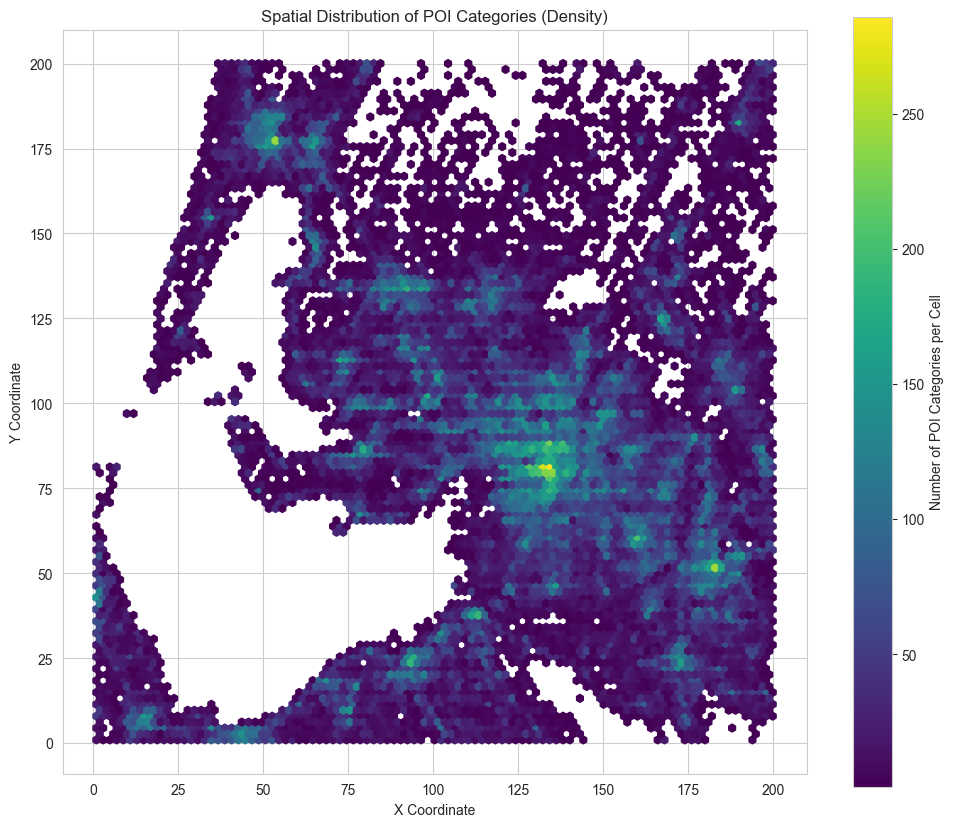

In [18]:
# Add this to a new code cell
if 'poi_df' in locals():
    plt.figure(figsize=(12, 10))
    # Use a hexbin plot for density visualization
    # Adjust gridsize as needed for your data's resolution
    plt.hexbin(poi_df['x'], poi_df['y'], gridsize=100, cmap='viridis', mincnt=1)
    plt.colorbar(label='Number of POI Categories per Cell')
    plt.title('Spatial Distribution of POI Categories (Density)')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.gca().set_aspect('equal', adjustable='box') # Keep aspect ratio square
    plt.show()
else:
    print("POI data (poi_df) not loaded. Skipping POI distribution plot.")

## Trajectory Visualization 

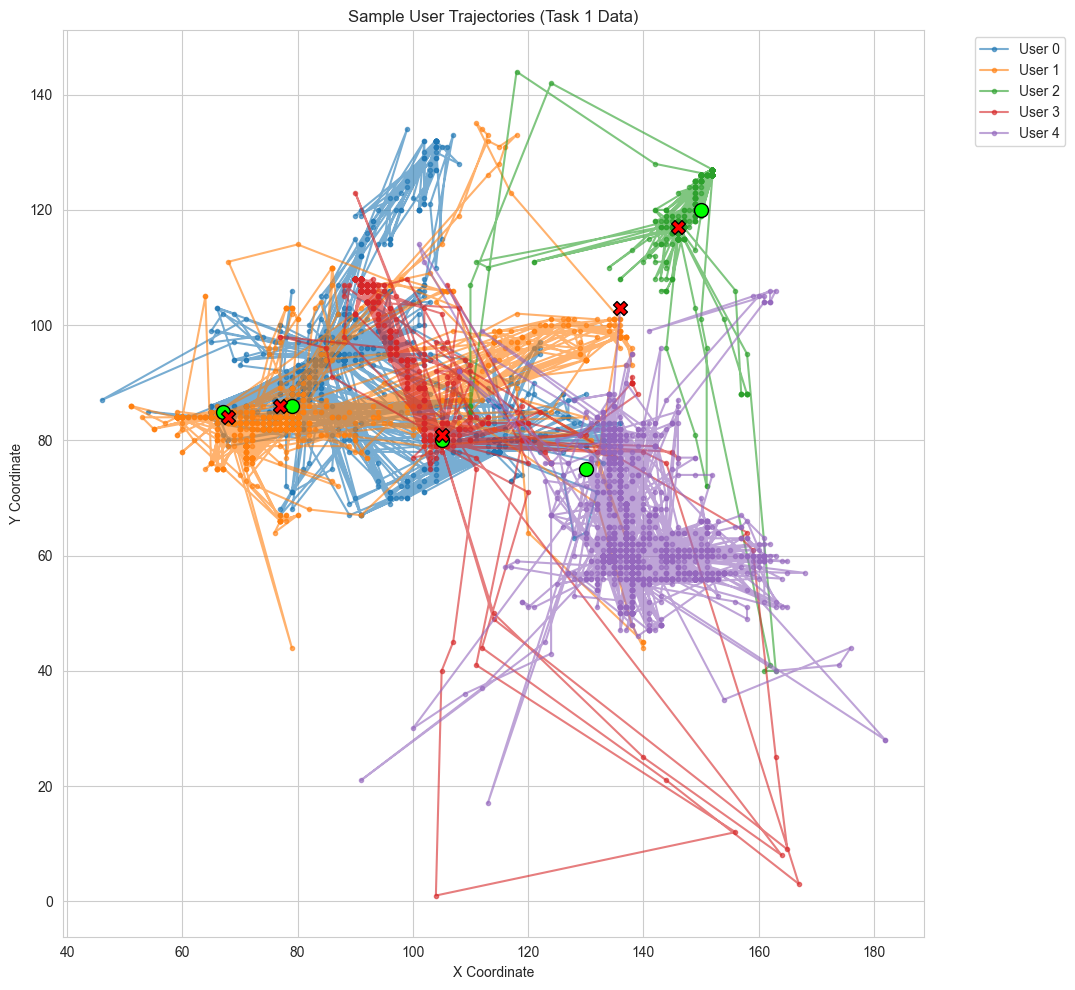

In [19]:
# Add this to a new code cell
if 'task1_df' in locals():
    # Select a few sample user IDs (e.g., first 5)
    sample_uids = task1_df['uid'].unique()[:5]

    plt.figure(figsize=(12, 10))

    for uid in sample_uids:
        # Get user trajectory, sorted by time
        user_traj = task1_df[task1_df['uid'] == uid].sort_values(by=['d', 't'])
        if not user_traj.empty:
            # Plot trajectory
            plt.plot(user_traj['x'], user_traj['y'], marker='.', linestyle='-', alpha=0.6, label=f'User {uid}')
            # Mark start point
            plt.scatter(user_traj['x'].iloc[0], user_traj['y'].iloc[0], color='lime', s=100, edgecolors='black', label=f'_Start User {uid}', zorder=5)
            # Mark end point
            plt.scatter(user_traj['x'].iloc[-1], user_traj['y'].iloc[-1], color='red', marker='X', s=100, edgecolors='black', label=f'_End User {uid}', zorder=5)

    plt.title('Sample User Trajectories (Task 1 Data)')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    # Place legend outside the plot to avoid overlap
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
    plt.show()
else:
    print("Task 1 data (task1_df) not loaded. Skipping trajectory plot.")


Sampling trajectories for users: [ 6623 11252 46198 11584 61654]
Plotting 221159 total POI entries.


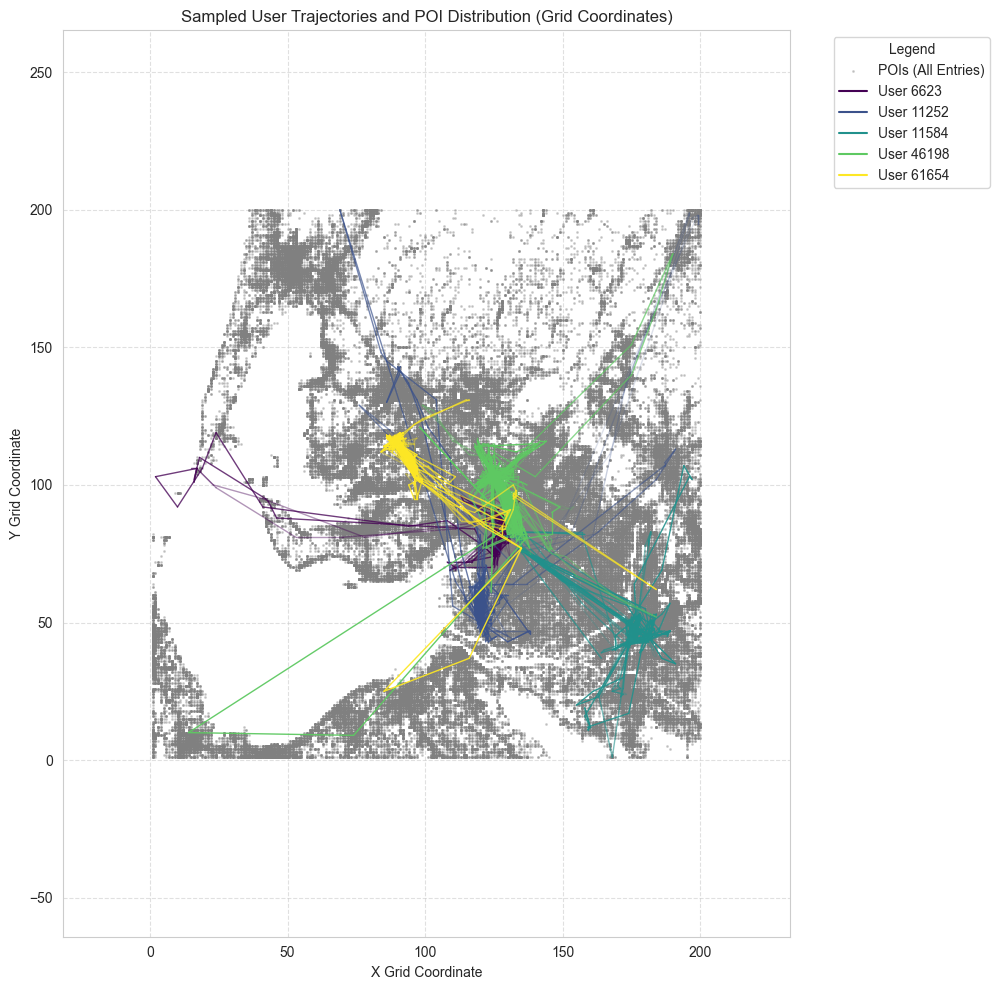

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# --- ASSUMPTIONS ---
# 1. task1_df is already loaded with columns: 'uid', 'd', 't', 'x', 'y'
# 2. poi_df is already loaded with columns: 'x', 'y', 'POIcategory', 'POI_count'
# If they have different names, please adjust the code below.

# --- 1. Prepare Data (Sampling Required) ---

# Check if dataframes exist
if 'task1_df' not in locals() or 'poi_df' not in locals():
    print("Error: Ensure 'task1_df' and 'poi_df' are loaded in previous cells.")
    # Stop execution or handle error
else:
    # --- Sample Trajectory Data ---
    num_users_to_plot = 5 # Adjust as needed
    all_users = task1_df['uid'].unique()
    if len(all_users) > num_users_to_plot:
        users_to_plot = np.random.choice(all_users, num_users_to_plot, replace=False)
    else:
        users_to_plot = all_users

    print(f"Sampling trajectories for users: {users_to_plot}")
    traj_sample_df = task1_df[task1_df['uid'].isin(users_to_plot)].copy()
    traj_sample_df = traj_sample_df.sort_values(by=['uid', 'd', 't'])

    # --- Prepare POI Data (No longer need unique locations for this plot type) ---
    # We will plot all POIs directly from poi_df
    print(f"Plotting {len(poi_df)} total POI entries.") # Updated print statement


    # --- 2. Visualization Setup ---
    plt.figure(figsize=(12, 10))

    # Assign colors to the selected users
    unique_users_sample = traj_sample_df['uid'].unique()
    try:
        colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(unique_users_sample)))
    except ValueError:
        colors = cm.rainbow(np.linspace(0, 1, max(1, len(unique_users_sample))))
    user_color_map = dict(zip(unique_users_sample, colors))

    # Normalize 'day' ('d' column) for transparency (alpha)
    min_day = traj_sample_df['d'].min()
    max_day = traj_sample_df['d'].max()
    day_range = max_day - min_day
    if day_range == 0:
        day_range = 1
        print("Warning: All sampled trajectory points have the same 'day' value. Transparency will be uniform.")

    # --- 3. Plot POIs (MODIFIED SECTION) ---
    # Plot ALL POI entries using small, semi-transparent dots
    plt.scatter(poi_df['x'], poi_df['y'],
                c='gray',       # Use a neutral color like gray
                marker='.',     # Use small dots
                s=5,            # Adjust size as needed
                label='POIs (All Entries)',
                zorder=2,       # Plot behind trajectories (lower zorder)
                alpha=0.3)      # Adjust transparency

    # --- 4. Plot Sampled Trajectories ---
    for user in unique_users_sample:
        user_traj = traj_sample_df[traj_sample_df['uid'] == user].copy()
        user_color = user_color_map[user]
        user_traj['alpha'] = 0.1 + 0.9 * (user_traj['d'] - min_day) / day_range

        for i in range(len(user_traj) - 1):
            p1 = user_traj.iloc[i]
            p2 = user_traj.iloc[i+1]
            alpha_val = min(p1['alpha'], 1.0)

            plt.plot([p1['x'], p2['x']], [p1['y'], p2['y']],
                     color=user_color,
                     alpha=alpha_val,
                     linewidth=1.0,
                     zorder=3) # Ensure trajectories are plotted above POIs

        # Add an invisible line for the legend
        plt.plot([], [], color=user_color, label=f'User {user}')


    # --- 5. Plot Customization ---
    plt.title('Sampled User Trajectories and POI Distribution (Grid Coordinates)')
    plt.xlabel('X Grid Coordinate')
    plt.ylabel('Y Grid Coordinate')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axis('equal')
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
    plt.show()


## Node Feature Visualization 

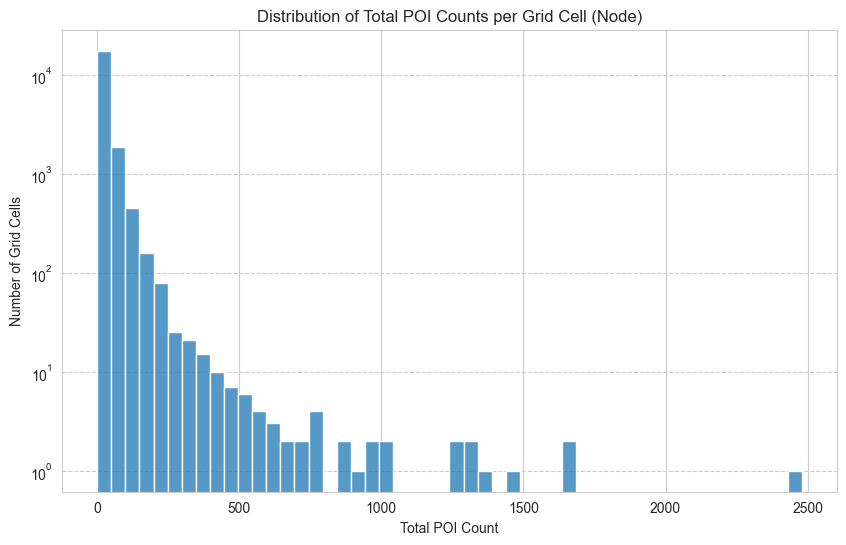

Descriptive statistics for POI counts per cell:


count    20146.000000
mean        24.579122
std         56.076929
min          1.000000
25%          3.000000
50%          9.000000
75%         27.000000
max       2479.000000
Name: POI_count, dtype: float64

In [21]:
# Add this to a new code cell
if 'poi_df' in locals():
    # Aggregate POI counts per grid cell (node)
    # A "node" in the graph context corresponds to a grid cell (x, y)
    node_poi_counts = poi_df.groupby(['x', 'y'])['POI_count'].sum().reset_index()

    plt.figure(figsize=(10, 6))
    # Plot histogram of total POI counts per cell
    sns.histplot(node_poi_counts['POI_count'], bins=50, kde=False) # KDE might be slow/heavy for large counts
    plt.title('Distribution of Total POI Counts per Grid Cell (Node)')
    plt.xlabel('Total POI Count')
    plt.ylabel('Number of Grid Cells')
    plt.yscale('log') # Use log scale for y-axis due to potential high variance
    plt.grid(axis='y', linestyle='--')
    plt.show()

    print("Descriptive statistics for POI counts per cell:")
    display(node_poi_counts['POI_count'].describe())
else:
    print("POI data (poi_df) not loaded. Skipping node feature plot.")


## Train/Validation/Test Split Visualization (for Task 1)


Loading data and splits...
Loaded Task 1 data: 111535175 rows with index type: <class 'pandas.core.indexes.range.RangeIndex'>
Loaded 85763208 train indices and 21440802 val indices.
Loaded 4331165 test indices.

Split distribution in loaded data:
split
train         85763208
validation    21440802
test           4331165
Name: count, dtype: int64

Plotting sample trajectories with split coloring...


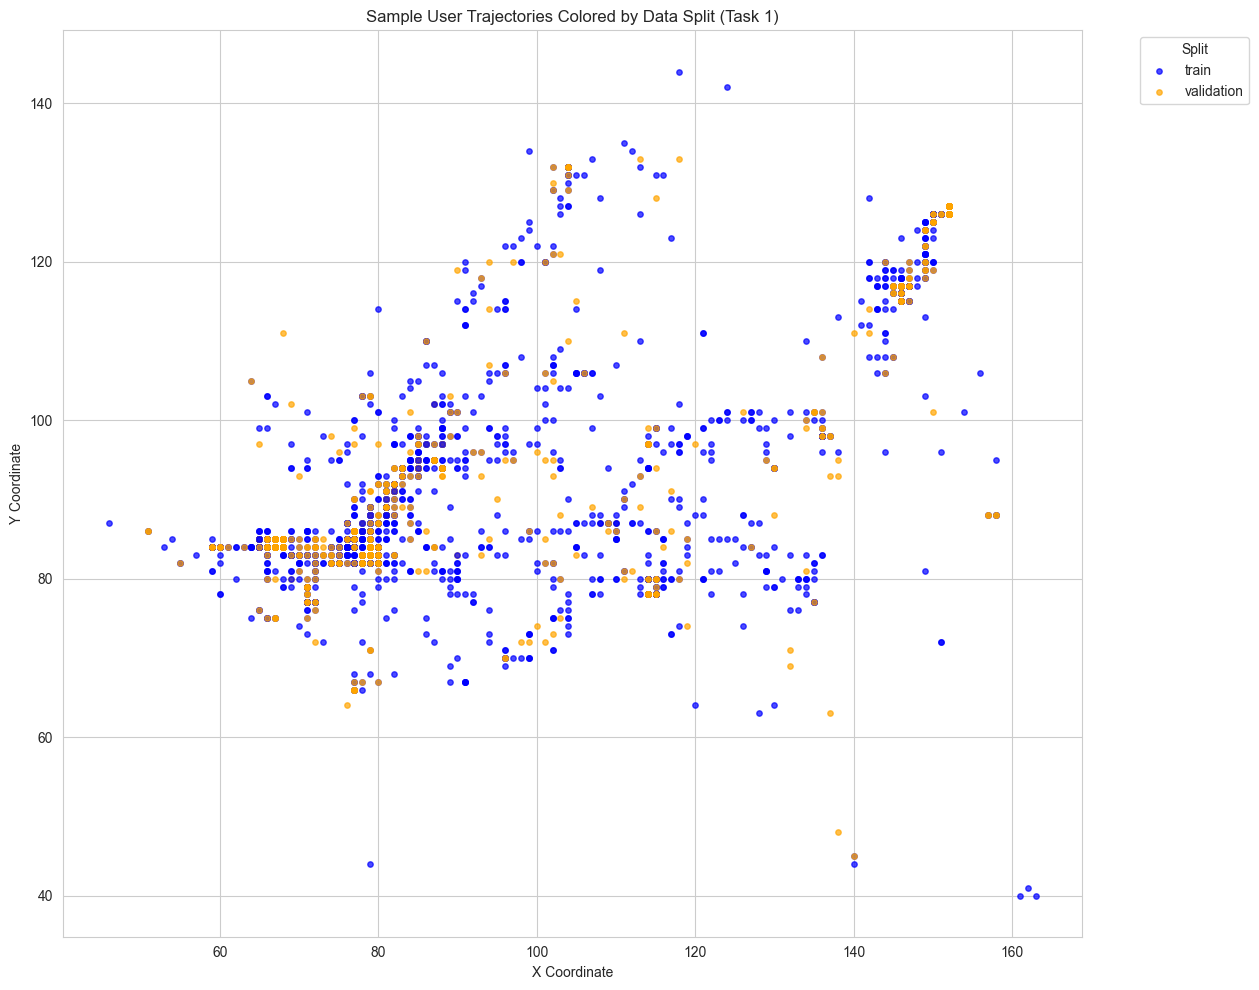

In [22]:
# Add this to a new code cell
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np # Import numpy for handling potential arrays in splits

# Define paths relative to the notebook directory
# Adjust these if your notebook is not in 'notebooks' or if your structure differs
if os.path.basename(os.getcwd()) == 'notebooks':
    processed_data_dir = '../data/processed/'
    raw_data_dir = '../data/raw/'
else: # Assuming run from project root
    processed_data_dir = 'data/processed/'
    raw_data_dir = 'data/raw/'

task1_data_path = os.path.join(raw_data_dir, 'task1_dataset_kotae.csv')
train_val_split_path = os.path.join(processed_data_dir, 'train_val_split_task1.pkl')
test_split_path = os.path.join(processed_data_dir, 'test_split_task1.pkl')

# Check if necessary files exist
if not os.path.exists(task1_data_path):
    print(f"Error: Task 1 data not found at {task1_data_path}")
elif not os.path.exists(train_val_split_path):
    print(f"Error: Train/Val split file not found at {train_val_split_path}")
elif not os.path.exists(test_split_path):
    print(f"Error: Test split file not found at {test_split_path}")
else:
    print("Loading data and splits...")
    # Load original data - using default integer index
    try:
        task1_df = pd.read_csv(task1_data_path)
        print(f"Loaded Task 1 data: {task1_df.shape[0]} rows with index type: {type(task1_df.index)}")
    except Exception as e:
        print(f"Error loading or processing Task 1 CSV: {e}")
        task1_df = None # Set to None to prevent further errors

    if task1_df is not None:
        # Load split identifiers (these are DataFrame indices saved by preprocess.py)
        train_indices, val_indices, test_indices = [], [], [] # Initialize as empty lists

        try:
            with open(train_val_split_path, 'rb') as f:
                # Load the dictionary containing 'train' and 'val' lists/sets of indices
                split_data = pickle.load(f)
                train_indices = split_data.get('train', []) # Get list of train indices
                val_indices = split_data.get('val', [])   # Get list of validation indices
                print(f"Loaded {len(train_indices)} train indices and {len(val_indices)} val indices.")
                # Optional: Check type if needed
                # print(f"Type of loaded train indices: {type(train_indices)}")
                # print(f"Type of loaded val indices: {type(val_indices)}")
        except Exception as e:
            print(f"Error loading train/val split: {e}")

        try:
            with open(test_split_path, 'rb') as f:
                # Load the dictionary containing 'test' list/set of indices
                split_data = pickle.load(f)
                test_indices = split_data.get('test', []) # Get list of test indices
                print(f"Loaded {len(test_indices)} test indices.")
                # Optional: Check type
                # print(f"Type of loaded test indices: {type(test_indices)}")
        except Exception as e:
            print(f"Error loading test split: {e}")

        # Add a 'split' column to the dataframe
        task1_df['split'] = 'unused' # Default

        # Use len(...) > 0 for robust checking and .loc with the loaded indices
        if len(train_indices) > 0:
            # Ensure indices are valid before assignment
            valid_train_indices = task1_df.index.intersection(train_indices)
            if len(valid_train_indices) > 0:
                 task1_df.loc[valid_train_indices, 'split'] = 'train'
            else:
                 print("Warning: No matching train indices found in the DataFrame index.")


        if len(val_indices) > 0:
            valid_val_indices = task1_df.index.intersection(val_indices)
            if len(valid_val_indices) > 0:
                task1_df.loc[valid_val_indices, 'split'] = 'validation'
            else:
                 print("Warning: No matching validation indices found in the DataFrame index.")

        if len(test_indices) > 0:
            valid_test_indices = task1_df.index.intersection(test_indices)
            if len(valid_test_indices) > 0:
                task1_df.loc[valid_test_indices, 'split'] = 'test'
            else:
                 print("Warning: No matching test indices found in the DataFrame index.")


        print("\nSplit distribution in loaded data:")
        # Check if 'split' column was successfully added before calling value_counts
        if 'split' in task1_df.columns:
            print(task1_df['split'].value_counts())
        else:
            print("Error: 'split' column not assigned.")


        # --- Visualization ---
        # This part should still work as it relies on 'uid', 'x', 'y', 'd', 't', and the 'split' column
        print("\nPlotting sample trajectories with split coloring...")
        sample_uids = task1_df['uid'].unique()[:3] # Plot fewer users for clarity

        plt.figure(figsize=(14, 10))

        split_colors = {'train': 'blue', 'validation': 'orange', 'test': 'red', 'unused': 'grey'}
        legend_labels_added = {split: False for split in split_colors} # Track legend labels

        for uid in sample_uids:
            # Filter by user ID and sort
            user_traj = task1_df[task1_df['uid'] == uid].sort_values(by=['d', 't'])
            if not user_traj.empty and 'split' in user_traj.columns:
                # Plot points colored by split
                for split_type, color in split_colors.items():
                    split_subset = user_traj[user_traj['split'] == split_type]
                    if not split_subset.empty:
                        label = split_type if not legend_labels_added[split_type] else None
                        plt.scatter(split_subset['x'], split_subset['y'],
                                    c=color,
                                    marker='o', s=15, alpha=0.7, label=label)
                        legend_labels_added[split_type] = True # Mark label as added

        plt.title('Sample User Trajectories Colored by Data Split (Task 1)')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.legend(title="Split", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend
        plt.show()

        # Optional cleanup
        # del task1_df
        # import gc
        # gc.collect()

## Engineered Node Feature Distribution

Loading graph data...
Loaded node features with shape: torch.Size([235501, 2])

Plotting distributions for the first few engineered node features (up to 5)...


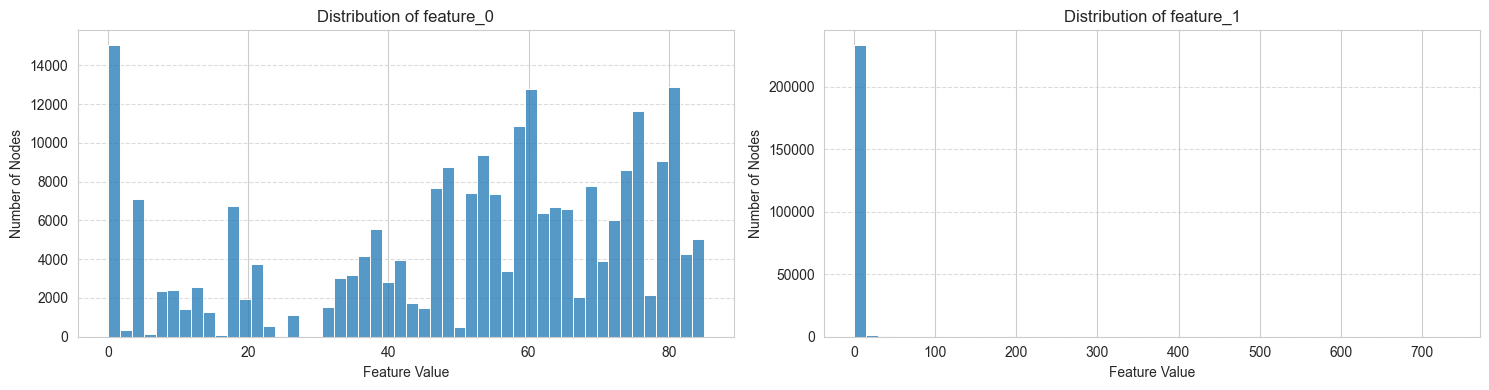


Descriptive statistics for the first few features:


feature_0      feature_1
count  235501.000000  235501.000000
mean       50.998085       2.102488
std        24.845655       3.991135
min         0.000000       0.000000
25%        38.000000       1.000000
50%        57.000000       1.000000
75%        73.000000       2.000000
max        85.000000     735.000000

In [23]:
# Add this to a new code cell
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd # Keep pandas imported

# Define path relative to the notebook directory
# Adjust these if your notebook is not in 'notebooks' or if your structure differs
if os.path.basename(os.getcwd()) == 'notebooks':
    processed_data_dir = '../data/processed/'
    # raw_data_dir = '../data/raw/' # Not needed for this cell
else: # Assuming run from project root
    processed_data_dir = 'data/processed/'
    # raw_data_dir = 'data/raw/' # Not needed for this cell

graph_data_path = os.path.join(processed_data_dir, 'graph_data.pt')

if not os.path.exists(graph_data_path):
    print(f"Error: Graph data not found at {graph_data_path}")
else:
    print("Loading graph data...")
    try:
        # Load the graph data object (which might contain node features `x`)
        # In PyTorch 2.6+, weights_only defaults to True. Set to False to load complex objects.
        # This is safe since we created the file ourselves using preprocess.py.
        graph_data = torch.load(graph_data_path, weights_only=False) # <<< FIX APPLIED HERE

        # Check if node features exist in the loaded object
        if hasattr(graph_data, 'x') and graph_data.x is not None:
            node_features = graph_data.x
            print(f"Loaded node features with shape: {node_features.shape}") # Shape: [num_nodes, num_features]

            # Convert to numpy or pandas for easier plotting
            if isinstance(node_features, torch.Tensor):
                # Detach from graph, move to CPU (if on GPU), and convert to NumPy
                node_features_np = node_features.detach().cpu().numpy()
            elif isinstance(node_features, np.ndarray):
                 node_features_np = node_features # Already numpy
            else:
                 print("Warning: Node features are not a recognizable Tensor or NumPy array.")
                 node_features_np = None # Handle other potential types if necessary

            if node_features_np is not None:
                num_features = node_features_np.shape[1]

                # --- Visualization ---
                print(f"\nPlotting distributions for the first few engineered node features (up to 5)...")

                # Create a DataFrame for easier plotting with seaborn/pandas
                # Use descriptive names if available, otherwise generic 'feature_i'
                # Example: Assuming features correspond to POI categories from preprocess.py
                # feature_names = [f'poi_cat_{i}' for i in range(num_features)]
                feature_names = [f'feature_{i}' for i in range(num_features)]
                feature_df = pd.DataFrame(node_features_np, columns=feature_names)

                # Plot histograms for the first few features
                plot_n_features = min(num_features, 5) # Limit plots for overview
                if plot_n_features > 0:
                    # Adjust subplot layout dynamically
                    ncols = 2
                    nrows = (plot_n_features + ncols - 1) // ncols
                    plt.figure(figsize=(15, 4 * nrows))
                    for i in range(plot_n_features):
                        plt.subplot(nrows, ncols, i + 1)
                        # Use the actual feature name in the title
                        sns.histplot(feature_df[feature_names[i]], bins=50, kde=False)
                        plt.title(f'Distribution of {feature_names[i]}')
                        plt.xlabel('Feature Value')
                        plt.ylabel('Number of Nodes')
                        # Consider log scale if distribution is highly skewed: plt.yscale('log')
                        plt.grid(axis='y', linestyle='--', alpha=0.7)
                    plt.tight_layout()
                    plt.show()

                    # Display descriptive statistics
                    print("\nDescriptive statistics for the first few features:")
                    display(feature_df.iloc[:, :plot_n_features].describe())

                    # Optional: Pairplot for correlations between the first few features
                    # if plot_n_features > 1:
                    #     print("\nPairplot for the first few features:")
                    #     # Using sample to speed up pairplot for large datasets
                    #     sample_frac = min(1.0, 5000 / len(feature_df)) # Adjust sample size as needed
                    #     sns.pairplot(feature_df.iloc[:, :plot_n_features].sample(frac=sample_frac),
                    #                  plot_kws={'alpha': 0.5, 's': 10}, diag_kind='hist')
                    #     plt.suptitle('Pairplot of First Few Engineered Node Features (Sampled)', y=1.02)
                    #     plt.show()
                else:
                    print("No node features to plot.")
            else:
                print("Could not convert node features to NumPy array for plotting.")

        else:
            print("Node features ('x') not found or is None in the loaded graph data object.")

    except Exception as e:
        print(f"Error loading or processing graph data: {e}")


## Load Necessary Data and Libraries

In [24]:
import json
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Ensure graph_data and node_mapping are loaded from previous cells ---
# This cell assumes 'graph_data' (torch_geometric Data object) and
# 'node_mapping' (dictionary {(x,y): node_id}) are already loaded.

# Also assumes 'processed_data_dir' is defined
node_mapping_path = os.path.join(processed_data_dir, 'node_mapping.json')
inv_node_mapping = None # Initialize

if 'graph_data' in locals() and graph_data is not None:
    print(f"Graph data loaded: {graph_data.num_nodes} nodes, {graph_data.num_edges} edges.")

    # --- Load Inverse Node Mapping ---
    if os.path.exists(node_mapping_path):
        print("Loading inverse node mapping (node_id -> (x, y))...")
        try:
            with open(node_mapping_path, 'r') as f:
                # Load the original mapping: {"x,y": node_id}
                mapping_dict = json.load(f)
                # Create inverse mapping: {node_id: (x, y)}
                inv_node_mapping = {v: tuple(map(int, k.split(','))) for k, v in mapping_dict.items()}
            print(f"Inverse node mapping loaded for {len(inv_node_mapping)} nodes.")
        except Exception as e:
            print(f"Error loading or processing node mapping: {e}")
    else:
        print(f"Error: Node mapping file not found at {node_mapping_path}")
else:
    print("Error: 'graph_data' not found or is None. Please run the cell that loads it first.")


Graph data loaded: 235501 nodes, 380180 edges.
Loading inverse node mapping (node_id -> (x, y))...
Inverse node mapping loaded for 34491 nodes.


## Node Spatial Distribution Visualization

In [ ]:
# --- Node Spatial Distribution ---
if inv_node_mapping is not None:
    print("\nVisualizing spatial distribution of graph nodes...")
    # Extract coordinates from the inverse mapping
    node_coords = list(inv_node_mapping.values())
    if node_coords:
        x_coords = [coord[0] for coord in node_coords]
        y_coords = [coord[1] for coord in node_coords]

        plt.figure(figsize=(12, 10))
        plt.scatter(x_coords, y_coords, s=5, alpha=0.6, label='Graph Nodes (Grid Cells)')
        plt.title('Spatial Distribution of Nodes in the Graph')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()
    else:
        print("No node coordinates found to plot.")
else:
    print("Skipping node spatial distribution plot: Inverse node mapping not available.")



Visualizing spatial distribution of graph nodes...


## Node Degree Distribution Visualization


Calculating and visualizing node degree distribution...


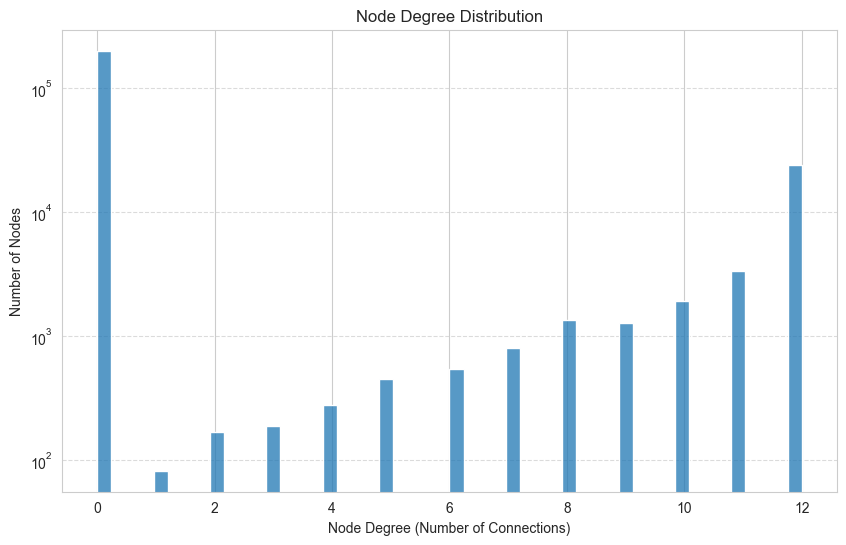


Node Degree Statistics:
count    235501.000000
mean          1.614346
std           3.971025
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
dtype: float64


In [33]:
# --- Node Degree Distribution ---
if 'graph_data' in locals() and graph_data is not None and hasattr(graph_data, 'edge_index'):
    print("\nCalculating and visualizing node degree distribution...")
    try:
        # Convert to NetworkX graph to easily calculate degrees
        # Note: This can be memory-intensive for very large graphs
        G = to_networkx(graph_data, to_undirected=True) # Assuming undirected for degree calc

        degrees = [d for n, d in G.degree()]

        if degrees:
            plt.figure(figsize=(10, 6))
            sns.histplot(degrees, bins=50, kde=False)
            plt.title('Node Degree Distribution')
            plt.xlabel('Node Degree (Number of Connections)')
            plt.ylabel('Number of Nodes')
            plt.yscale('log') # Often helpful for degree distributions
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

            print("\nNode Degree Statistics:")
            degree_series = pd.Series(degrees)
            print(degree_series.describe())
        else:
            print("Could not calculate node degrees.")

    except Exception as e:
        print(f"Error converting graph or calculating degrees: {e}")
else:
    print("Skipping node degree plot: Graph data or edge_index not available.")


## Features of a Sample Node

In [50]:
# --- Features of a Sample Node ---
if ('graph_data' in locals() and graph_data is not None and hasattr(graph_data, 'x') and
    inv_node_mapping is not None):
    print("\nDisplaying features for a sample node...")
    # Select a sample node index (e.g., the first node)
    sample_node_id = 0
    if 0 <= sample_node_id < graph_data.num_nodes:
        # Get coordinates
        sample_coords = inv_node_mapping.get(sample_node_id, "Coordinates not found")

        # Get features
        sample_features_tensor = graph_data.x[sample_node_id]
        sample_features_list = sample_features_tensor.detach().cpu().numpy().tolist()

        print(f"Sample Node ID: {sample_node_id}")
        print(f"Coordinates (x, y): {sample_coords}")
        # Display only the first few features for brevity if vector is long
        num_features_to_show = min(10, len(sample_features_list))
        print(f"Features (first {num_features_to_show} of {len(sample_features_list)}): {sample_features_list[:num_features_to_show]}")
        if len(sample_features_list) > num_features_to_show:
            print("...")

        # You could potentially map these features back to POI category names
        # if you load 'POI_datacategories.csv' and know the order of features.
    else:
        print(f"Sample node ID {sample_node_id} is out of range (0-{graph_data.num_nodes - 1}).")
else:
    print("Skipping sample node feature display: Graph data, features, or mapping not available.")



Displaying features for a sample node...
Sample Node ID: 0
Coordinates (x, y): (79, 86)
Features (first 2 of 2): [1.0, 1.0]


Loading graph data from: ../data/processed/graph_data.pt
Loaded graph data: 235501 nodes, 380180 edges.
Loading node mapping from: ../data/processed/node_mapping.json
Loaded positions for 34491 nodes.

Creating NetworkX graph from PyG data...
NetworkX graph created: 235501 nodes, 190090 edges.
Creating subgraph with 34491 nodes that have coordinate mappings.
Loading and parsing POI descriptions for 34491 nodes...
Loaded descriptions for 34491 nodes.
Parsed POI data for 34491 nodes in the subgraph.
Creating POI heatmap visualization...
Error during visualization: 'PathCollection' object is not subscriptable


Traceback (most recent call last):
  File "C:\Users\90764\AppData\Local\Temp\ipykernel_57728\4074002057.py", line 167, in <module>
    top_nodes = [nodes[i] for i in top_indices]
                 ~~~~~^^^
TypeError: 'PathCollection' object is not subscriptable


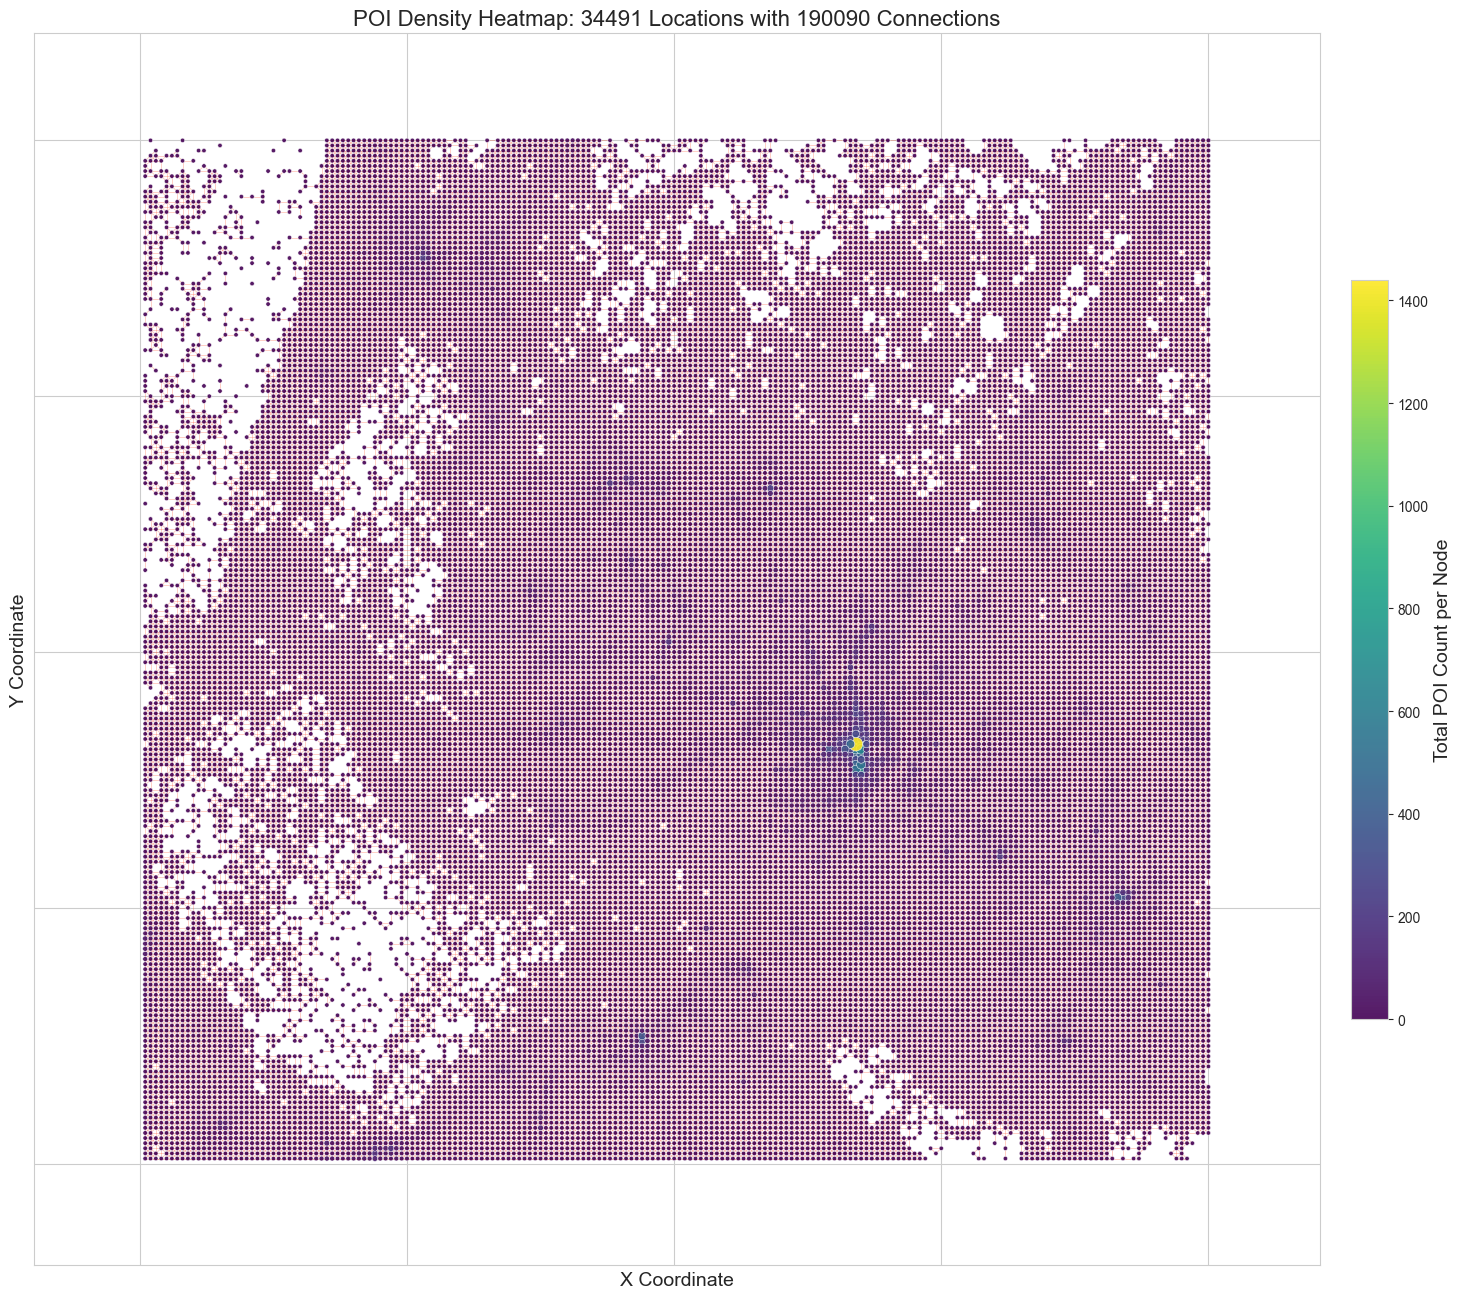

In [62]:
import json
import networkx as nx
import torch
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import numpy as np
import re
import os

# --- Configuration ---
if os.path.basename(os.getcwd()) == 'notebooks':
    processed_data_dir = '../data/processed/'
else: # Assuming run from project root
    processed_data_dir = 'data/processed/'

node_mapping_path = os.path.join(processed_data_dir, 'node_mapping.json')
descriptions_path = os.path.join(processed_data_dir, 'node_text_descriptions.json')
graph_data_path = os.path.join(processed_data_dir, 'graph_data.pt')

# --- Load Data ---
# Load graph data
if os.path.exists(graph_data_path):
    print(f"Loading graph data from: {graph_data_path}")
    try:
        graph_data = torch.load(graph_data_path, weights_only=False)
        print(f"Loaded graph data: {graph_data.num_nodes} nodes, {graph_data.num_edges} edges.")
    except Exception as e:
        print(f"Error loading graph data: {e}")
        graph_data = None
else:
    print(f"Error: Graph data file not found.")
    graph_data = None

# Load node mapping
if os.path.exists(node_mapping_path):
    print(f"Loading node mapping from: {node_mapping_path}")
    try:
        with open(node_mapping_path, 'r') as f:
            mapping_dict = json.load(f)
            node_positions = {int(v): np.array(list(map(int, k.split(',')))) for k, v in mapping_dict.items()}
            mapped_node_ids = set(node_positions.keys())
        print(f"Loaded positions for {len(node_positions)} nodes.")
    except Exception as e:
        print(f"Error loading node mapping: {e}")
        node_positions = None
        mapped_node_ids = None
else:
    print(f"Error: Node mapping file not found.")
    node_positions = None
    mapped_node_ids = None

# --- Create NetworkX Graph ---
if graph_data is not None and node_positions is not None and mapped_node_ids is not None:
    print("\nCreating NetworkX graph from PyG data...")
    try:
        # Convert to NetworkX
        graph_data.edge_index = graph_data.edge_index.long()
        G_full = to_networkx(graph_data, to_undirected=True)
        print(f"NetworkX graph created: {G_full.number_of_nodes()} nodes, {G_full.number_of_edges()} edges.")
        
        # Create subgraph of nodes with coordinates
        nodes_to_keep = mapped_node_ids.intersection(G_full.nodes())
        print(f"Creating subgraph with {len(nodes_to_keep)} nodes that have coordinate mappings.")
        G_sub = G_full.subgraph(nodes_to_keep).copy()
        subgraph_positions = {node: pos for node, pos in node_positions.items() if node in G_sub}
        
        # --- Parse Descriptions to Extract POI Counts ---
        print(f"Loading and parsing POI descriptions for {len(G_sub.nodes())} nodes...")
        
        # Regular expression to extract POI counts from descriptions
        # Pattern looks for: X CategoryName where X is a number
        poi_pattern = re.compile(r'(\d+)\s+([^,\.]+)')
        
        # Store POI counts per node
        node_poi_counts = {}
        node_poi_categories = {}
        
        # Function to extract total POI count and categories from a description
        def parse_poi_description(desc):
            # Find all matches in description
            matches = poi_pattern.findall(desc)
            total_count = sum(int(count) for count, _ in matches)
            categories = len(matches)
            return total_count, categories
        
        try:
            # Load JSON file with node descriptions
            with open(descriptions_path, 'r', encoding='utf-8') as f:
                descriptions = json.load(f)
                print(f"Loaded descriptions for {len(descriptions)} nodes.")
                
                # Process descriptions for nodes in our subgraph
                for node_id in G_sub.nodes():
                    node_str = str(node_id)
                    if node_str in descriptions:
                        desc = descriptions[node_str]
                        total_pois, num_categories = parse_poi_description(desc)
                        node_poi_counts[node_id] = total_pois
                        node_poi_categories[node_id] = num_categories
                
                print(f"Parsed POI data for {len(node_poi_counts)} nodes in the subgraph.")
        except Exception as e:
            print(f"Error processing descriptions: {e}")
            # Fallback to using node degrees if description parsing fails
            node_poi_counts = dict(G_sub.degree())
            node_poi_categories = {n: 1 for n in G_sub.nodes()}
            print("Falling back to node degrees for coloring.")
        
        # --- Visualization with POI Heatmap ---
        print("Creating POI heatmap visualization...")
        plt.figure(figsize=(20, 16))
        
        # For both node coloring and sizing, we'll use the total POI count
        nodes = list(G_sub.nodes())
        
        # Get POI counts in consistent order for the nodes
        node_values = [node_poi_counts.get(n, 0) for n in nodes]
        
        # Get max and min values for normalization
        max_poi = max(node_values) if node_values else 1
        min_poi = min(node_values) if node_values else 0
        
        # Normalize node sizes between 10 and 100 based on POI count
        if max_poi != min_poi:
            node_sizes = [10 + 90 * (val - min_poi) / (max_poi - min_poi) for val in node_values]
        else:
            node_sizes = [20] * len(node_values)  # Default size if all same
        
        # Draw EDGES with high visibility
        nx.draw_networkx_edges(
            G_sub, 
            pos=subgraph_positions,
            edge_color='#FF5733',  # Bright orange/red for contrast
            width=0.5,            # Thicker than before
            alpha=0.4             # More visible
        )
        
        # Draw NODES with custom heatmap
        nodes = nx.draw_networkx_nodes(
            G_sub,
            pos=subgraph_positions,
            nodelist=nodes,
            node_size=node_sizes,
            node_color=node_values,
            cmap='viridis',      # Good perceptual colormap
            edgecolors='white',  # White borders
            linewidths=0.4,
            alpha=0.9,           # More opaque
            vmin=min_poi,
            vmax=max_poi
        )
        
        # Add colorbar
        cbar = plt.colorbar(nodes, shrink=0.6, pad=0.02)
        cbar.set_label('Total POI Count per Node', fontsize=14)
        
        # Add title and labels
        plt.title(f'POI Density Heatmap: {len(G_sub.nodes())} Locations with {G_sub.number_of_edges()} Connections',
                  fontsize=16)
        plt.xlabel('X Coordinate', fontsize=14)
        plt.ylabel('Y Coordinate', fontsize=14)
        
        # Add annotations for some high-POI nodes (top 5)
        if node_values:
            # Get indices of top 5 nodes by POI count
            top_indices = sorted(range(len(node_values)), key=lambda i: node_values[i], reverse=True)[:5]
            top_nodes = [nodes[i] for i in top_indices]
            
            # Add text labels for top nodes showing count and position
            for node_id in top_nodes:
                if node_id in subgraph_positions:
                    x, y = subgraph_positions[node_id]
                    poi_count = node_poi_counts.get(node_id, 0)
                    if poi_count > 0:  # Only label if has POIs
                        plt.text(x+0.5, y+0.5, 
                                f"Node {node_id}: {poi_count} POIs",
                                fontsize=10, 
                                bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))
        
        # General formatting
        plt.gca().set_aspect('equal', adjustable='box')
        plt.tight_layout()
        plt.grid(False)
        
        plt.show()
        print("POI Heatmap visualization complete!")
        
    except Exception as e:
        import traceback
        print(f"Error during visualization: {e}")
        traceback.print_exc()

else:
    print("Cannot generate visualization: Missing required data.")

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

# --- Load Data ---
llm_data_path = os.path.join(processed_data_dir, 'llm_sequences_train_val_task1.pt')
try:
    llm_data = torch.load(llm_data_path, weights_only=False)
    print(f"Loaded LLM sequence data. Keys: {list(llm_data.keys())}")
except Exception as e:
    print(f"Error loading LLM data: {e}")
    llm_data = None

# --- Plot Lengths ---
if llm_data and 'train' in llm_data and 'val' in llm_data:
    train_seqs = llm_data['train']
    val_seqs = llm_data['val']

    # Calculate lengths (handle potential tensors or lists)
    train_lengths = [len(seq.tolist() if isinstance(seq, torch.Tensor) else seq) for seq in train_seqs]
    val_lengths = [len(seq.tolist() if isinstance(seq, torch.Tensor) else seq) for seq in val_seqs]

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(train_lengths, bins=50, kde=False)
    plt.title('Train Sequence Length Distribution')
    plt.xlabel('Sequence Length')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.histplot(val_lengths, bins=50, kde=False)
    plt.title('Validation Sequence Length Distribution')
    plt.xlabel('Sequence Length')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

    print(f"Train lengths: Min={np.min(train_lengths)}, Max={np.max(train_lengths)}, Avg={np.mean(train_lengths):.2f}")
    print(f"Val lengths: Min={np.min(val_lengths)}, Max={np.max(val_lengths)}, Avg={np.mean(val_lengths):.2f}")
else:
    print("Could not plot sequence lengths: Data not loaded or keys 'train'/'val' missing.")

Error loading LLM data: [Errno 2] No such file or directory: 'data\\prepared_for_llm\\llm_sequences_train_val_task1.pt'
Could not plot sequence lengths: Data not loaded or keys 'train'/'val' missing.


<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
C:\Users\90764\AppData\Local\Temp\ipykernel_57728\595749540.py:5: SyntaxWarning: invalid escape sequence '\p'
  prepared_for_llm = "data\prepared_for_llm"


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

# --- Load Data ---
llm_data_path = os.path.join(processed_data_dir, 'llm_sequences_train_val_task1.pt')
try:
    llm_data = torch.load(llm_data_path, weights_only=False)
    print(f"Loaded LLM sequence data. Keys: {list(llm_data.keys())}")
except Exception as e:
    print(f"Error loading LLM data: {e}")
    llm_data = None

# --- Plot Lengths ---
if llm_data and 'train' in llm_data and 'val' in llm_data:
    train_seqs = llm_data['train']
    val_seqs = llm_data['val']

    # Calculate lengths (handle potential tensors or lists)
    train_lengths = [len(seq.tolist() if isinstance(seq, torch.Tensor) else seq) for seq in train_seqs]
    val_lengths = [len(seq.tolist() if isinstance(seq, torch.Tensor) else seq) for seq in val_seqs]

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(train_lengths, bins=50, kde=False)
    plt.title('Train Sequence Length Distribution')
    plt.xlabel('Sequence Length')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.histplot(val_lengths, bins=50, kde=False)
    plt.title('Validation Sequence Length Distribution')
    plt.xlabel('Sequence Length')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

    print(f"Train lengths: Min={np.min(train_lengths)}, Max={np.max(train_lengths)}, Avg={np.mean(train_lengths):.2f}")
    print(f"Val lengths: Min={np.min(val_lengths)}, Max={np.max(val_lengths)}, Avg={np.mean(val_lengths):.2f}")
else:
    print("Could not plot sequence lengths: Data not loaded or keys 'train'/'val' missing.")

Error loading LLM data: [Errno 2] No such file or directory: '../data/processed/llm_sequences_train_val_task1.pt'
Could not plot sequence lengths: Data not loaded or keys 'train'/'val' missing.


In [54]:
from collections import Counter
import pandas as pd

# --- (Load llm_data as above) ---

if llm_data and 'train' in llm_data:
    all_train_nodes = []
    for seq in llm_data['train']:
        # Convert tensor to list if needed
        nodes_in_seq = seq.tolist() if isinstance(seq, torch.Tensor) else seq
        all_train_nodes.extend(nodes_in_seq)

    node_counts = Counter(all_train_nodes)
    most_common_nodes = node_counts.most_common(20) # Top 20 most frequent nodes

    if most_common_nodes:
        # Create DataFrame for plotting
        freq_df = pd.DataFrame(most_common_nodes, columns=['Node ID', 'Frequency'])

        plt.figure(figsize=(12, 6))
        sns.barplot(x='Frequency', y='Node ID', data=freq_df, orient='h', palette='viridis')
        plt.title('Top 20 Most Frequent Nodes in Training Sequences')
        plt.xlabel('Frequency Count')
        plt.ylabel('Node ID')
        plt.gca().invert_yaxis() # Show highest frequency at the top
        plt.tight_layout()
        plt.show()

        # Optional: Print coordinates if node_positions is available
        # if 'node_positions' in locals() and node_positions:
        #    print("Coordinates of most frequent nodes:")
        #    for node_id, freq in most_common_nodes:
        #        coords = node_positions.get(node_id, 'N/A')
        #        print(f"  Node {node_id}: Freq={freq}, Coords={coords}")

    else:
        print("No nodes found in training sequences.")
else:
        print("Could not analyze node frequency: Data not loaded or key 'train' missing.")

Could not analyze node frequency: Data not loaded or key 'train' missing.
